In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
import random
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kerembalc","key":"c746f2baa96ef14bd23edd7ad971f654"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d nikhilbhathi/data-scientist-salary-us-glassdoor

  0% 0.00/1.00M [00:00<?, ?B/s]
100% 1.00M/1.00M [00:00<00:00, 49.2MB/s]


In [ ]:
! unzip data-scientist-salary-us-glassdoor.zip

Archive:  data-scientist-salary-us-glassdoor.zip
  inflating: data_cleaned_2021.csv   


In [ ]:
data=pd.read_csv("/content/data_cleaned_2021.csv",index_col=0)
df=data.copy()
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [ ]:
df=df 

In [ ]:
df=df.replace(['-1'],[np.nan])
df=df.replace([-1],[np.nan])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 955
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              731 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        741 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             692 non-null    float64
 9   Type of ownership   742 non-null    object 
 10  Industry            732 non-null    object 
 11  Sector              732 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         282 non-null    object 
 14  Hourly              742 non-null    float64
 15  Employer provided   742 non-null    float64
 16  Lower Sa

In [ ]:
df.shape

(742, 41)

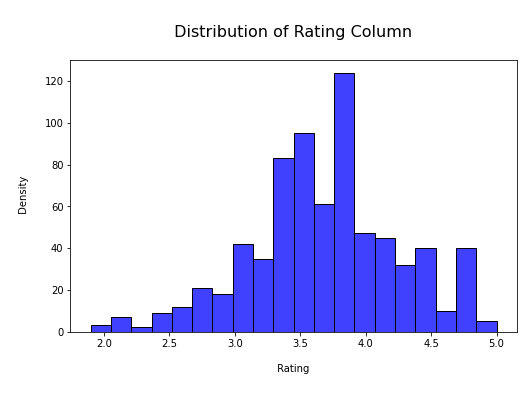

In [ ]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Rating Column \n', size=16, color='black')
plt.xlabel('\n Rating \n')
plt.ylabel('\n Density\n')
sns.histplot(df["Rating"],color="blue")
plt.show()

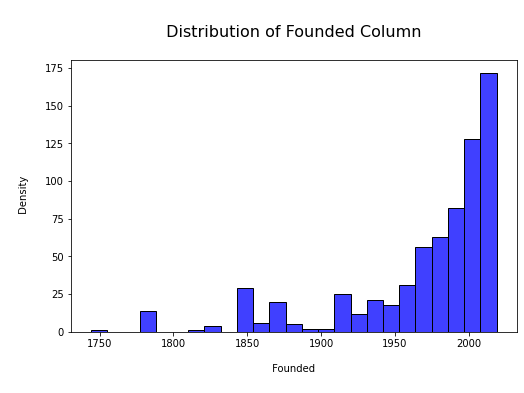

In [ ]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Founded Column \n', size=16, color='black')
plt.xlabel('\n Founded \n')
plt.ylabel('\n Density\n')
sns.histplot(df["Founded"],color="blue")
plt.show()

In [ ]:
df["Competitors"] = df["Competitors"].fillna(df["Competitors"].mode()[0]) 
df["Industry"] = df["Industry"].fillna(df["Industry"].mode()[0]) 
df["Sector"] = df["Sector"].fillna(df["Sector"].mode()[0]) 
df["Headquarters"] = df["Headquarters"].fillna(df["Headquarters"].mode()[0]) 

In [ ]:
df["Rating"] = df["Rating"].fillna(df["Rating"].mean())

In [ ]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [ ]:
df["Founded"] = df["Founded"].fillna(df["Founded"].median())

In [ ]:
df["Company Name"]=df["Company Name"].str[:-4]

In [ ]:
df["Company Name"]

index
0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
950                                      GSK
951                               Eventbrite
952           Software Engineering Institute
953                             Numeric, LLC
955             Riverside Research Institute
Name: Company Name, Length: 742, dtype: object

In [ ]:
df["company_txt"]

index
0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
950                                      GSK
951                               Eventbrite
952           Software Engineering Institute
953                             Numeric, LLC
955             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [ ]:
df.seniority_by_title.value_counts()

na    519
sr    220
jr      3
Name: seniority_by_title, dtype: int64

In [ ]:
df.Degree.value_counts()

na    383
M     252
P     107
Name: Degree, dtype: int64

In [ ]:
pd.options.display.max_columns=None


In [ ]:
df.shape

(742, 41)

In [ ]:
df.drop("Headquarters",axis=1,inplace=True)
df.drop("Competitors",axis=1,inplace=True)
df.drop("Job Title",axis=1,inplace=True)
df.drop("Salary Estimate",axis=1,inplace=True)
df.drop("Industry",axis=1,inplace=True)
df.drop("Employer provided",axis=1,inplace=True)
df.drop("Lower Salary",axis=1,inplace=True)
df.drop("Upper Salary",axis=1,inplace=True)

In [ ]:
df.drop("Job Location",axis=1,inplace=True)

In [ ]:
df.drop('Location',axis=1,inplace=True)

In [ ]:
df.drop("Job Description",axis=1,inplace=True)
df.drop('Founded',axis=1,inplace=True)
df.drop("Company Name",axis=1,inplace=True)

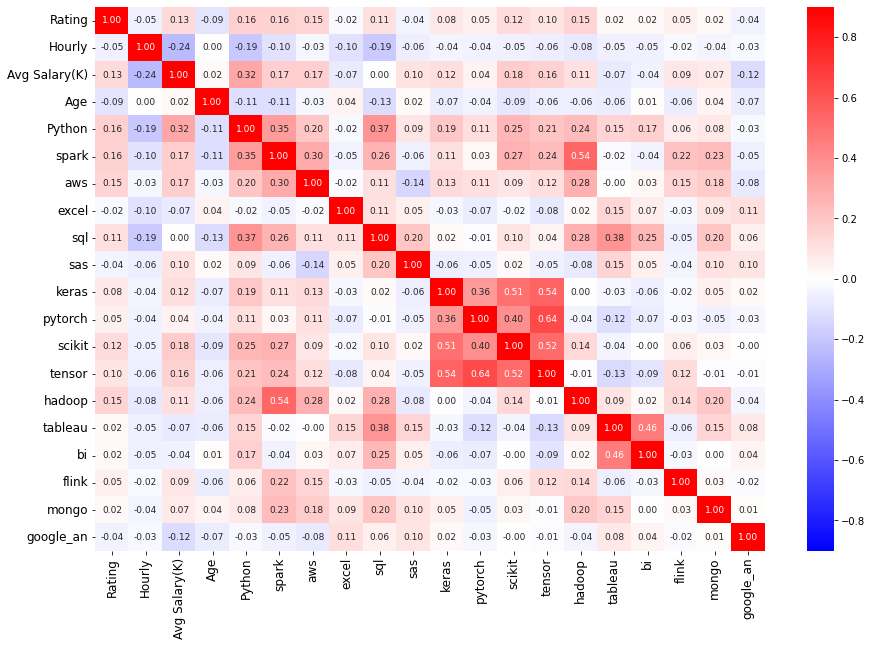

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot=True,cmap='bwr',annot_kws={'size':9},vmax=0.9,vmin=-0.9,fmt='.2f')
plt.xticks(fontsize = 12)
plt.xticks(rotation=90)
plt.yticks(fontsize = 12)
plt.yticks(rotation=0)
plt.show()

In [ ]:
df_categoric = df.select_dtypes(include = object)
df_categoric.columns

Index(['Size', 'Type of ownership', 'Sector', 'Revenue', 'company_txt',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [ ]:
# Corr analysis of categoric vals.
from scipy.stats import f_oneway
 
anova=df.groupby('Degree')['Avg Salary(K)'].apply(list)
 
AnovaResults = f_oneway(*anova)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  9.992521158879105e-08


In [ ]:
df.shape

(742, 28)

In [ ]:
len(df.Sector.value_counts())

24

In [ ]:
salary1=df

In [ ]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.head()

,Rating,Hourly,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
index,,,,,,,,,,,,,,,,,,,,
0,3.8,0.0,72.0,48.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,3.4,0.0,87.5,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.8,0.0,85.0,11.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.8,0.0,76.5,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.9,0.0,114.5,23.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_numeric.shape

(742, 20)

In [ ]:
df_categoric.shape

(742, 8)

In [ ]:
dummy_encoded_variables = pd.get_dummies(df_categoric, drop_first = True)
dummy_encoded_variables.head()

,Size_10000+,Size_1001 - 5000,Size_201 - 500,Size_5001 - 10000,Size_501 - 1000,Size_51 - 200,Size_unknown,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,company_txt_1904labs,company_txt_23andMe,company_txt_7Park Data,company_txt_<intent>,company_txt_ALI,company_txt_AVANADE,company_txt_AXION Healthcare Solutions,company_txt_Acceleron Pharma,company_txt_Accuride International,company_txt_Acuity Insurance,company_txt_Adobe,company_txt_Advanced BioScience Laboratories,company_txt_Affinity Solutions,company_txt_Agios Pharmaceuticals,company_txt_Alignment Healthcare,company_txt_Alliance Source Testing,company_txt_AmeriHealth Caritas,company_txt_American Axle & Manufacturing,company_txt_Ameritas Life Insurance Corp,company_txt_Amrock,company_txt_Applied Information Sciences,company_txt_Applied Research Laboratories,company_txt_Arbella Insurance,company_txt_Argo Group US,company_txt_Associated Banc-Corp,company_txt_Associated Electric Cooperative,company_txt_Assurant,company_txt_AstraZeneca,company_txt_Audentes Therapeutics,company_txt_Audible,company_txt_Autodesk,company_txt_BPA Services,company_txt_BRMi,company_txt_BWX Technologies,company_txt_Bakery Agency,company_txt_Beck's Hybrids,company_txt_Beckman Coulter Diagnostics,company_txt_Beebe Healthcare,company_txt_Berg Health,company_txt_Bill.com,company_txt_BioMarin Pharmaceutical,company_txt_Biz2Credit Inc,company_txt_Blue Cross & Blue Shield of Rhode Island,company_txt_BlueCross BlueShield of Tennessee,company_txt_Blueprint Medicines,company_txt_Boys Town,company_txt_Boys Town Hospital,company_txt_Bridg,company_txt_Brighthouse Financial,company_txt_Brillient,company_txt_C Space,company_txt_CA-One Tech Clou,company_txt_CALIBRE Systems,company_txt_CBS Interactive,company_txt_CK-12 Foundation,company_txt_COUNTRY Financial,company_txt_CapTech,company_txt_Capgemini,company_txt_CareDx,company_txt_Carilion Clinic,company_txt_Carmeuse,company_txt_Caterpillar,company_txt_Catholic Health Initiatives,company_txt_Cboe Global Markets,company_txt_Centauri,company_txt_Central California Alliance for Health,company_txt_CentralReach,company_txt_Centro,company_txt_Cerus Corporation,company_txt_Change Healthcare,company_txt_Charter Spectrum,company_txt_Church & Dwight,company_txt_Citadel Federal Credit Union,company_txt_Citi,company_txt_Clarity Insights,company_txt_ClearEdge,company_txt_ClearOne Advantage,company_txt_Clearwater Analytics,company_txt_Cogo Labs,company_txt_Community Action Partnership of San Luis Obispo,company_txt_Community Behavioral Health,company_txt_CompQsoft,"company_txt_Conch Technologies, Inc",company_txt_Confluent,company_txt_Corcentric,company_txt_Credera,company_txt_Credit Sesame,company_txt_Crossix Solutions,company_txt_Crown Bioscience,company_txt_CyrusOne,company_txt_DECISIVE

In [ ]:
dummy_encoded_variables.shape

(742, 405)

In [ ]:
df_dummy = pd.concat([df_numeric, dummy_encoded_variables], axis=1)

df_dummy.head()


,Rating,Hourly,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,Size_10000+,Size_1001 - 5000,Size_201 - 500,Size_5001 - 10000,Size_501 - 1000,Size_51 - 200,Size_unknown,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,company_txt_1904labs,company_txt_23andMe,company_txt_7Park Data,company_txt_<intent>,company_txt_ALI,company_txt_AVANADE,company_txt_AXION Healthcare Solutions,company_txt_Acceleron Pharma,company_txt_Accuride International,company_txt_Acuity Insurance,company_txt_Adobe,company_txt_Advanced BioScience Laboratories,company_txt_Affinity Solutions,company_txt_Agios Pharmaceuticals,company_txt_Alignment Healthcare,company_txt_Alliance Source Testing,company_txt_AmeriHealth Caritas,company_txt_American Axle & Manufacturing,company_txt_Ameritas Life Insurance Corp,company_txt_Amrock,company_txt_Applied Information Sciences,company_txt_Applied Research Laboratories,company_txt_Arbella Insurance,company_txt_Argo Group US,company_txt_Associated Banc-Corp,company_txt_Associated Electric Cooperative,company_txt_Assurant,company_txt_AstraZeneca,company_txt_Audentes Therapeutics,company_txt_Audible,company_txt_Autodesk,company_txt_BPA Services,company_txt_BRMi,company_txt_BWX Technologies,company_txt_Bakery Agency,company_txt_Beck's Hybrids,company_txt_Beckman Coulter Diagnostics,company_txt_Beebe Healthcare,company_txt_Berg Health,company_txt_Bill.com,company_txt_BioMarin Pharmaceutical,company_txt_Biz2Credit Inc,company_txt_Blue Cross & Blue Shield of Rhode Island,company_txt_BlueCross BlueShield of Tennessee,company_txt_Blueprint Medicines,company_txt_Boys Town,company_txt_Boys Town Hospital,company_txt_Bridg,company_txt_Brighthouse Financial,company_txt_Brillient,company_txt_C Space,company_txt_CA-One Tech Clou,company_txt_CALIBRE Systems,company_txt_CBS Interactive,company_txt_CK-12 Foundation,company_txt_COUNTRY Financial,company_txt_CapTech,company_txt_Capgemini,company_txt_CareDx,company_txt_Carilion Clinic,company_txt_Carmeuse,company_txt_Caterpillar,company_txt_Catholic Health Initiatives,company_txt_Cboe Global Markets,company_txt_Centauri,company_txt_Central California Alliance for Health,company_txt_CentralReach,company_txt_Centro,company_txt_Cerus Corporation,company_txt_Change Healthcare,company_txt_Charter Spectrum,company_txt_Church & Dwight,company_txt_Citadel Federal Credit Union,company_txt_Citi,company_txt_Clarity Insights,company_txt_ClearEdge,company_txt_ClearOne Advantage,company_txt_Clearwater Analytics,company_txt_Cogo Labs,company_txt_Community Action Partnership of San Luis Obispo,company_txt_Community Behavioral Health,company_txt_CompQsoft,"company_txt_Conch Technologies, Inc",company_txt_Confluent,company_txt_Corcentric,company_txt_Cre

In [ ]:
X = df_dummy.drop(["Avg Salary(K)"], axis = 1)

y = df_dummy[["Avg Salary(K)"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


print("The shape of X_train is:",X_train.shape)

print("The shape of X_test is:",X_test.shape)

print("The shape of y_train is:",y_train.shape)

print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (593, 424)
The shape of X_test is: (149, 424)
The shape of y_train is: (593, 1)
The shape of y_test is: (149, 1)


In [ ]:
actual_salary = y_test["Avg Salary(K)"]

In [ ]:
# LINEAR REGRESSION
linreg_full = sm.OLS(y_train, X_train).fit()
linreg_full_predictions = linreg_full.predict(X_test)

In [ ]:
# calculate rmse using rmse()
linreg_full_rmse = rmse(actual_salary,linreg_full_predictions )
mae_linreg = metrics.mean_absolute_error(y_test, linreg_full_predictions)

# calculate R-squared using rsquared
linreg_full_rsquared = linreg_full.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_rsquared_adj = linreg_full.rsquared_adj 

In [ ]:
cols = ['Model','MAE', 'RMSE', 'R-Squared']
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_full_metrics = pd.Series({'Model': "Linear Regression ",
                      'MAE' : mae_linreg,           
                     'RMSE':linreg_full_rmse,
                     'R-Squared': linreg_full_rsquared    
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,MAE,RMSE,R-Squared
0,Linear Regression,15.55322,28.596678,0.917188


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
parameters = {'alpha':[1, 10]}

model = Ridge()

Ridge_reg= GridSearchCV(model, parameters, scoring='r2',cv=5)

Ridge_reg.fit(X,y)

print(Ridge_reg.best_estimator_)

best_model = Ridge_reg.best_estimator_

Ridge(alpha=1)


In [ ]:
##RIDGE REGRESSION

from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 17.010 (2.788)


In [ ]:
model.fit(X_train,y_train)
r_squared_ridge=model.score(X_test,y_test)
y_pred_ridge = model.predict(X_test)
mae_ridge = metrics.mean_absolute_error(y_test, y_pred_ridge)
print(r_squared_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(rmse_ridge)

0.5828218811463324
24.068046507080776


In [ ]:
linreg_full_metrics = pd.Series({'Model': "Ridge Regression ",
                                 'MAE' : mae_ridge,
                     'RMSE':rmse_ridge,
                     'R-Squared': r_squared_ridge    
                   })

result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)


result_tabulation

,Model,MAE,RMSE,R-Squared
0,Linear Regression,15.553220,28.596678,0.917188
1,Ridge Regression,16.600829,24.068047,0.582822


In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_tree = DecisionTreeRegressor(criterion = 'squared_error', random_state = 10)

decision_tree_model = decision_tree.fit(X_train, y_train)

In [ ]:
y_pred_DT=decision_tree_model.predict(X_test)

In [ ]:
r_squared_DT=decision_tree_model.score(X_test,y_test)
mae_DT = metrics.mean_absolute_error(y_test, y_pred_DT)
rmse_DT = np.sqrt(mean_squared_error(y_test, y_pred_DT))

In [ ]:
linreg_full_metrics = pd.Series({'Model': "Decision Tree Model ",
                                 'MAE' : mae_DT,
                     'RMSE':rmse_DT,
                     'R-Squared': r_squared_DT   
                   })

result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

result_tabulation

,Model,MAE,RMSE,R-Squared
0,Linear Regression,15.553220,28.596678,0.917188
1,Ridge Regression,16.600829,24.068047,0.582822
2,Decision Tree Model,12.228188,23.244135,0.610895


In [ ]:
from sklearn.ensemble import RandomForestRegressor
tuned_paramaters = [{'n_estimators': [ 45,50,60,70,85,100]
                     #'min_samples_split': [10,15,20]
                     #'max_depth': [8, 10,12],
                     #'min_samples_leaf': [5,10],
                     #'max_leaf_nodes': [10, 15]
                    }]

rf_reg_CV= RandomForestRegressor(random_state = 10)

grid = GridSearchCV(estimator = rf_reg_CV, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

dt_grid = grid.fit(X_train, y_train)

print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best parameters for random forest regressor:  {'n_estimators': 85} 



In [ ]:

rf_reg = RandomForestRegressor(n_estimators=70,random_state=10)

rf_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(n_estimators=70, random_state=10)

In [ ]:
y_pred_RF = rf_reg.predict(X_test)

In [ ]:
# Calculate MAE
mae_rf = metrics.mean_absolute_error(y_test, y_pred_RF)
print('Mean Absolute Error (MAE):', mae_rf)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred_RF)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

r_squared_RF=rf_reg.score(X_test,y_test)
print('Rsquared error :', r_squared_RF )

Mean Absolute Error (MAE): 13.81450577586364
Mean Squared Error (MSE): 385.4031994061747
Root Mean Squared Error (RMSE): 19.631688653963895
Rsquared error : 0.722441102961398


In [ ]:
linreg_full_metrics = pd.Series({'Model': "Random Forest ",
                                 'MAE' : mae_rf,
                     'RMSE':rf_reg_RMSE,
                     'R-Squared': r_squared_RF
                         
                   })

result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

result_tabulation

,Model,MAE,RMSE,R-Squared
0,Linear Regression,15.553220,28.596678,0.917188
1,Ridge Regression,16.600829,24.068047,0.582822
2,Decision Tree Model,12.228188,23.244135,0.610895
3,Random Forest,13.814506,19.631689,0.722441


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
params_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,20,40,55,60,100]}

knn =KNeighborsRegressor()

model = GridSearchCV(knn, params_knn, cv=10)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 2}

In [ ]:
model_knn=KNeighborsRegressor(n_neighbors=2)
model_knn=model_knn.fit(X_train,y_train)
y_pred_knn=model_knn.predict(X_test)

In [ ]:
knn_MAE = metrics.mean_absolute_error(y_test, y_pred_knn)
print('Mean Absolute Error (MAE):', knn_MAE)

# calculate MSE
knn_MSE = metrics.mean_squared_error(y_test, y_pred_knn)
print('Mean Squared Error (MSE):', knn_MSE)
                                         
# calculate RMSE
knn_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error (RMSE):', knn_RMSE)

r_squared_knn=model_knn.score(X_test,y_test)
print('rsquared:',r_squared_knn)

Mean Absolute Error (MAE): 20.916107382550337
Mean Squared Error (MSE): 886.146812080537
Root Mean Squared Error (RMSE): 29.76821815427549
rsquared: 0.3618165802610963


In [ ]:
linreg_full_metrics = pd.Series({'Model': "KNN Regressor ",
                                 'MAE' : knn_MAE,
                     'RMSE':knn_RMSE,
                     'R-Squared': r_squared_knn    
                   })

result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

result_tabulation

,Model,MAE,RMSE,R-Squared
0,Linear Regression,15.553220,28.596678,0.917188
1,Ridge Regression,16.600829,24.068047,0.582822
2,Decision Tree Model,12.228188,23.244135,0.610895
3,Random Forest,13.814506,19.631689,0.722441
4,KNN Regressor,20.916107,29.768218,0.361817


In [ ]:
from sklearn.svm import SVR
param_grid = {'C': [ 5,20, 100,200], 'gamma': [1,0.1,0.01,0.001]}#,'kernel': ['rbf', 'linear']}
SVC=SVR()
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................................C=5, gamma=1; total time=   0.1s
[CV] END .......................................C=5, gamma=1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................................C=5, gamma=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................................C=5, gamma=1; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................................C=5, gamma=1; total time=   0.2s
[CV] END .....................................C=5, gamma=0.1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=5, gamma=0.1; total time=   0.1s
[CV] END .....................................C=5, gamma=0.1; total time=   0.1s
[CV] END .....................................C=5, gamma=0.1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=5, gamma=0.1; total time=   0.1s
[CV] END ....................................C=5, gamma=0.01; total time=   0.1s
[CV] END ....................................C=5, gamma=0.01; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=5, gamma=0.01; total time=   0.1s
[CV] END ....................................C=5, gamma=0.01; total time=   0.1s
[CV] END ....................................C=5, gamma=0.01; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=5, gamma=0.001; total time=   0.1s
[CV] END ...................................C=5, gamma=0.001; total time=   0.1s
[CV] END ...................................C=5, gamma=0.001; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=5, gamma=0.001; total time=   0.1s
[CV] END ...................................C=5, gamma=0.001; total time=   0.1s
[CV] END ......................................C=20, gamma=1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................................C=20, gamma=1; total time=   0.1s
[CV] END ......................................C=20, gamma=1; total time=   0.1s
[CV] END ......................................C=20, gamma=1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................................C=20, gamma=1; total time=   0.1s
[CV] END ....................................C=20, gamma=0.1; total time=   0.1s
[CV] END ....................................C=20, gamma=0.1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=20, gamma=0.1; total time=   0.1s
[CV] END ....................................C=20, gamma=0.1; total time=   0.1s
[CV] END ....................................C=20, gamma=0.1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=20, gamma=0.01; total time=   0.1s
[CV] END ...................................C=20, gamma=0.01; total time=   0.1s
[CV] END ...................................C=20, gamma=0.01; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=20, gamma=0.01; total time=   0.1s
[CV] END ...................................C=20, gamma=0.01; total time=   0.1s
[CV] END ..................................C=20, gamma=0.001; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=20, gamma=0.001; total time=   0.1s
[CV] END ..................................C=20, gamma=0.001; total time=   0.1s
[CV] END ..................................C=20, gamma=0.001; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=20, gamma=0.001; total time=   0.1s
[CV] END .....................................C=100, gamma=1; total time=   0.1s
[CV] END .....................................C=100, gamma=1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=100, gamma=1; total time=   0.1s
[CV] END .....................................C=100, gamma=1; total time=   0.1s
[CV] END .....................................C=100, gamma=1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=100, gamma=0.1; total time=   0.1s
[CV] END ...................................C=100, gamma=0.1; total time=   0.1s
[CV] END ...................................C=100, gamma=0.1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=100, gamma=0.1; total time=   0.1s
[CV] END ...................................C=100, gamma=0.1; total time=   0.1s
[CV] END ..................................C=100, gamma=0.01; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=100, gamma=0.01; total time=   0.1s
[CV] END ..................................C=100, gamma=0.01; total time=   0.1s
[CV] END ..................................C=100, gamma=0.01; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=100, gamma=0.01; total time=   0.1s
[CV] END .................................C=100, gamma=0.001; total time=   0.1s
[CV] END .................................C=100, gamma=0.001; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................................C=100, gamma=0.001; total time=   0.1s
[CV] END .................................C=100, gamma=0.001; total time=   0.1s
[CV] END .................................C=100, gamma=0.001; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=200, gamma=1; total time=   0.1s
[CV] END .....................................C=200, gamma=1; total time=   0.1s
[CV] END .....................................C=200, gamma=1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=200, gamma=1; total time=   0.1s
[CV] END .....................................C=200, gamma=1; total time=   0.1s
[CV] END ...................................C=200, gamma=0.1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=200, gamma=0.1; total time=   0.1s
[CV] END ...................................C=200, gamma=0.1; total time=   0.1s
[CV] END ...................................C=200, gamma=0.1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=200, gamma=0.1; total time=   0.1s
[CV] END ..................................C=200, gamma=0.01; total time=   0.1s
[CV] END ..................................C=200, gamma=0.01; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=200, gamma=0.01; total time=   0.1s
[CV] END ..................................C=200, gamma=0.01; total time=   0.1s
[CV] END ..................................C=200, gamma=0.01; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................................C=200, gamma=0.001; total time=   0.1s
[CV] END .................................C=200, gamma=0.001; total time=   0.1s
[CV] END .................................C=200, gamma=0.001; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................................C=200, gamma=0.001; total time=   0.1s
[CV] END .................................C=200, gamma=0.001; total time=   0.1s
SVR(C=200, gamma=0.1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

model_svr = SVR(C=100,gamma=0.1,kernel='linear')

model_svr.fit(X_train, y_train)
y_pred_svr=model_svr.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
score = model_svr.score(X_test,y_test)
print("R-squared:", score)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))

R-squared: 0.4952359571595545
RMSE: 26.4742878377519


In [ ]:
mae_svr = metrics.mean_absolute_error(y_test, y_pred_svr)
print('Mean Absolute Error (MAE):', mae_svr)

# Calculate MSE
svr_reg_MSE = metrics.mean_squared_error(y_test, y_pred_svr)
print('Mean Squared Error (MSE):', svr_reg_MSE)

# Calculate RMSE
svr_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr))
print('Root Mean Squared Error (RMSE):', svr_reg_RMSE)

r_squared_SVR=model_svr.score(X_test,y_test)
print('Rsquared error :', r_squared_SVR )

Mean Absolute Error (MAE): 14.518303972552731
Mean Squared Error (MSE): 700.8879165161381
Root Mean Squared Error (RMSE): 26.4742878377519
Rsquared error : 0.4952359571595545


In [ ]:
linreg_full_metrics = pd.Series({'Model': "SVR Regressor ",
                                 'MAE' : mae_svr,
                     'RMSE':svr_reg_RMSE,
                     'R-Squared': r_squared_SVR    
                   })

result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

result_tabulation

,Model,MAE,RMSE,R-Squared
0,Linear Regression,15.553220,28.596678,0.917188
1,Ridge Regression,16.600829,24.068047,0.582822
2,Decision Tree Model,12.228188,23.244135,0.610895
3,Random Forest,13.814506,19.631689,0.722441
4,KNN Regressor,20.916107,29.768218,0.361817
5,SVR Regressor,14.518304,26.474288,0.495236


In [ ]:
print(model_svr.intercept_)
print(model_svr.coef_)

[82.04390784]
[[ 2.63434414e+00 -2.52295150e+01 -4.74196285e-02  3.28192939e+00
   3.59026222e+00  6.03119464e+00 -5.00008914e-01 -4.96041490e+00
   1.24871488e+01  3.74481828e+00 -6.70537527e+00  8.52842701e+00
  -3.20513242e-01  3.29791884e+00  3.73695551e+00  8.51211167e-01
   2.14446784e+00  3.18322466e+00 -3.45404961e+00 -3.47037731e+00
   2.61141926e+00 -3.74579587e+00 -6.65187039e+00 -3.26151162e+00
   4.98191155e+00  1.49089548e+01 -1.29320950e+00  8.32519162e+00
  -3.70398558e+00 -3.71847804e+00 -5.45889782e+00 -1.48506879e+01
   4.04532295e+00  7.56492808e+00 -9.81125436e-01 -8.31584393e+00
  -1.08283337e+01  1.59007158e+01 -1.63696561e+00  1.74827626e+00
  -4.75189321e+00 -1.00658397e+01 -9.56497135e-02 -1.25230815e+00
   8.68607342e+00  1.00981738e+01  8.88496456e-01 -8.37098678e-01
   1.00554288e+01  0.00000000e+00 -3.86874714e+00 -1.01581882e+01
  -2.65775015e+00  1.44405587e+01 -8.06996807e+00 -6.92860854e-01
  -5.63883705e+00 -7.14221017e+00 -7.10287870e+00  7.17320095e